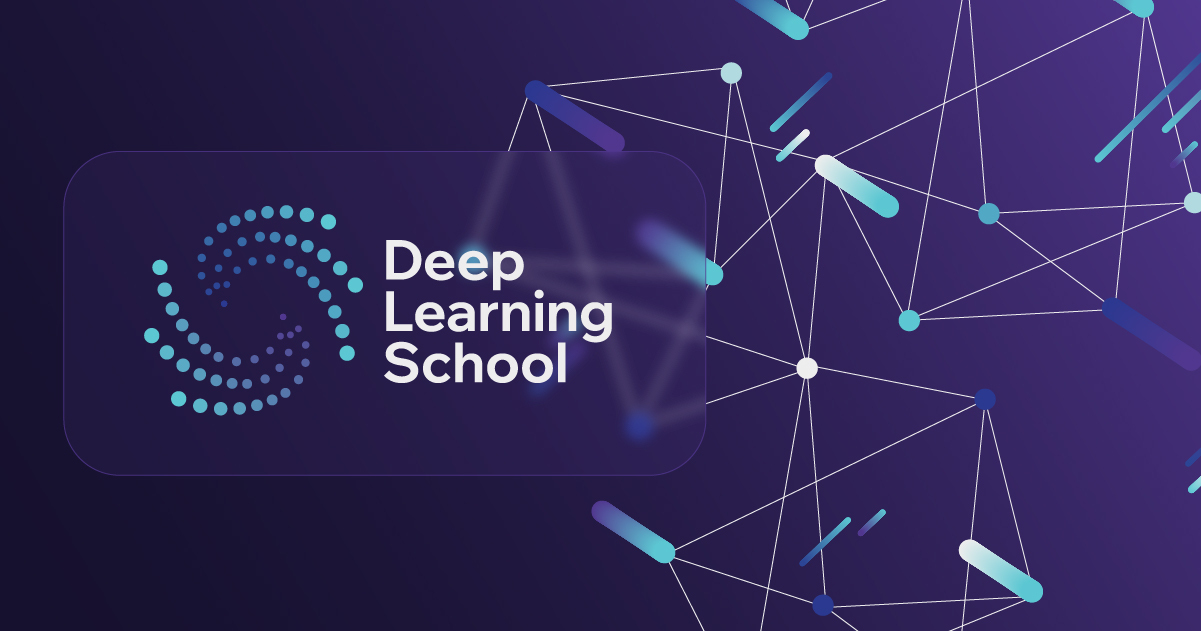

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Решение конкурса на kaggle</b></h1>



Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [2]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 13.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 9.88MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 28.2MB/s]


In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Выведем таблица со всеми nan-ами, подсчитанными по столбцам
data.isna().sum()
# Как видно из таблицы, nan-ы отсутствуют

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [6]:
# Преобразуем значение TotalSpent из строки в число для корректного отображения на гистограмме
data['TotalSpent'] = data['TotalSpent'].map(lambda x:float('0' if x.strip()=='' else x.strip()))

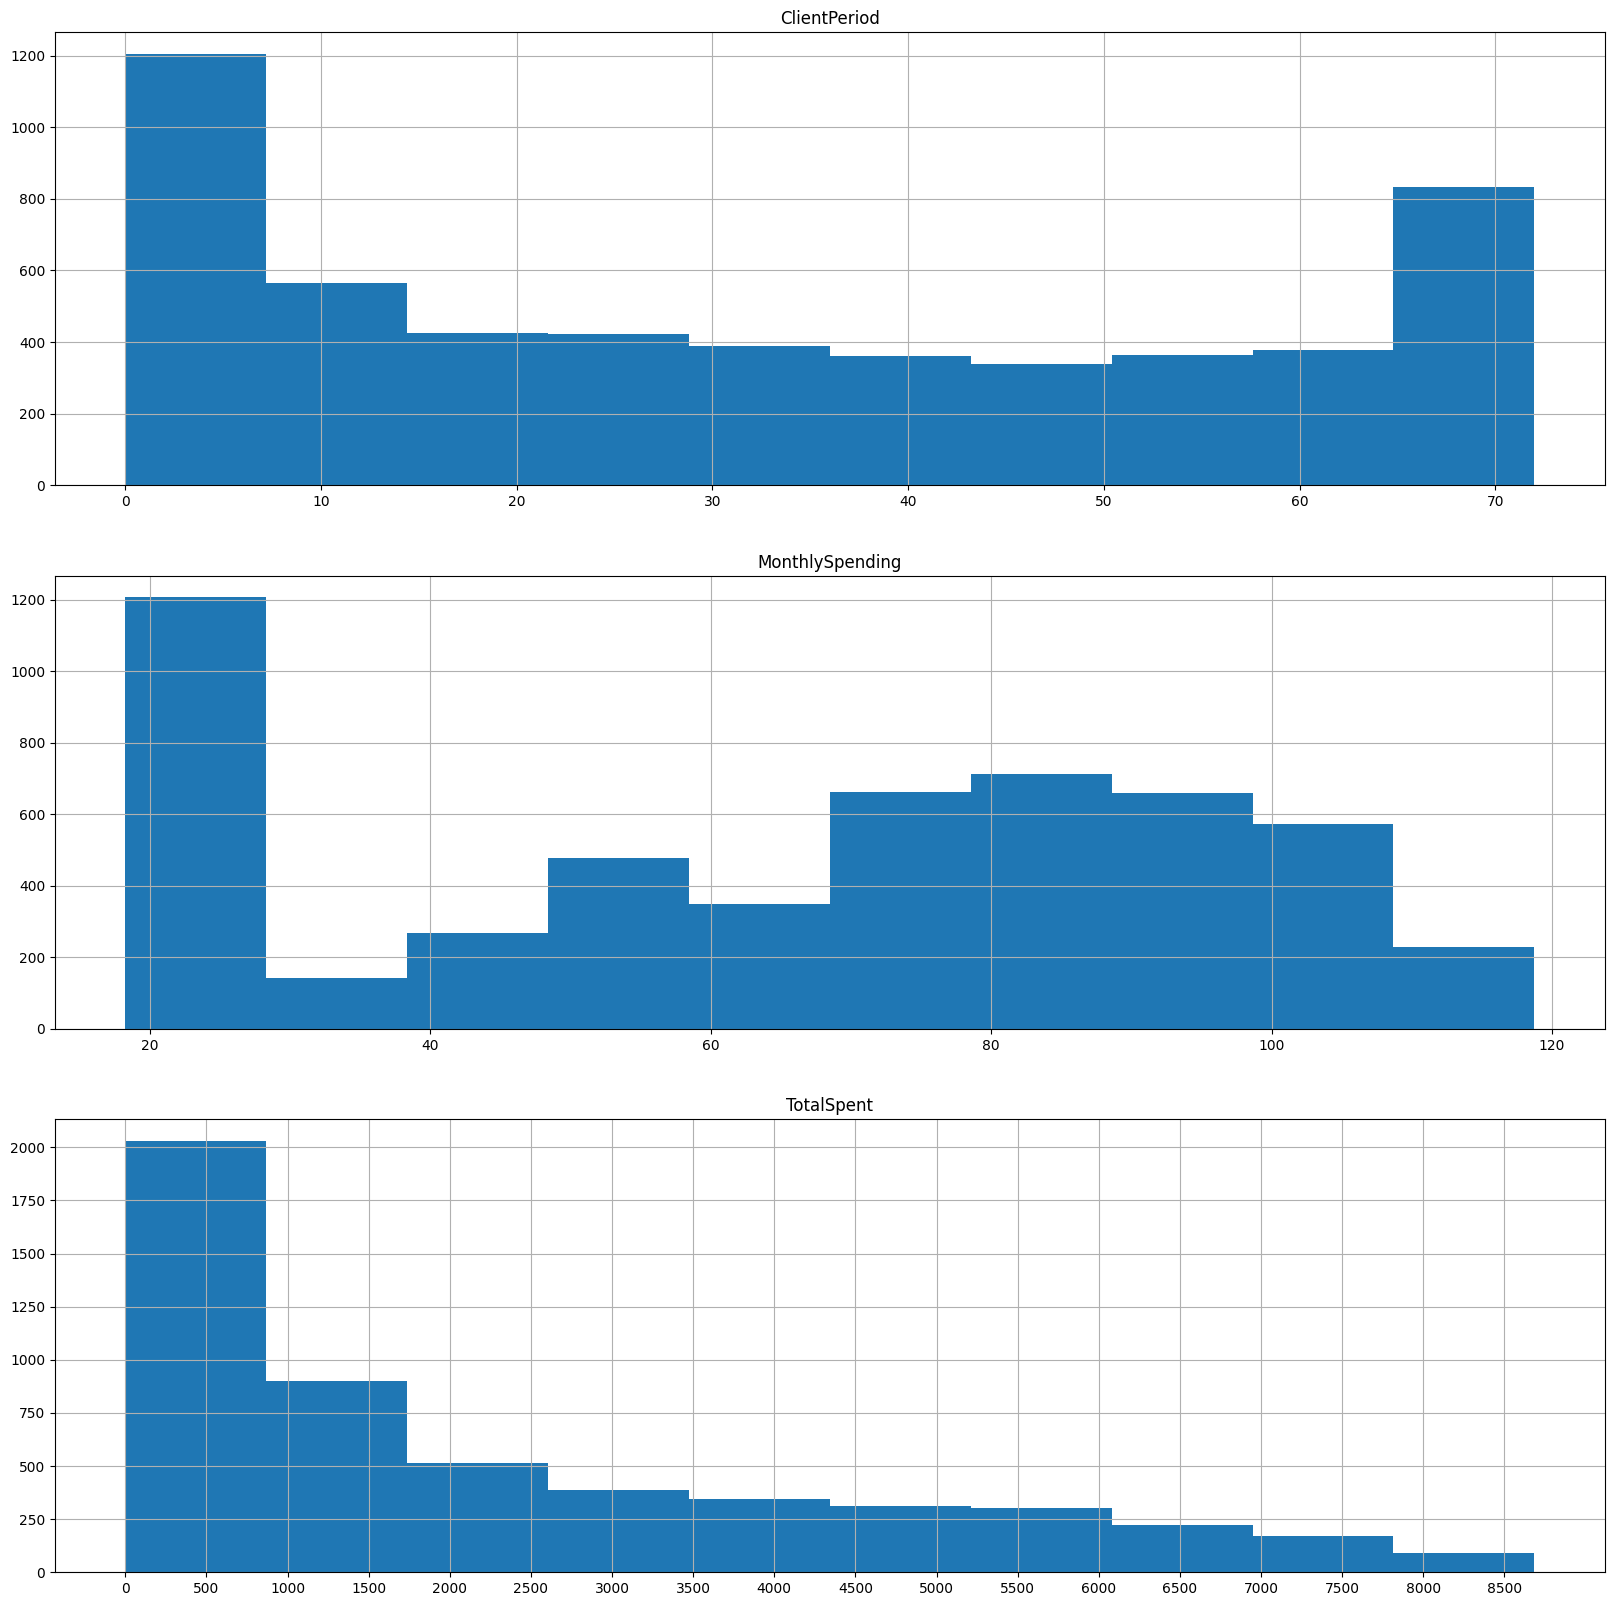

In [7]:
# Построим гистограммы количественных признаков

f, axes = plt.subplots(len(num_cols),1)

f.set_figwidth(20)
f.set_figheight(20)

for i, ax in enumerate(axes):
    ax.hist(data[num_cols[i]])
    ax.set_title(num_cols[i])
    ax.set_xlabel = num_cols[i]
    ax.set_ylabel = 'Count'
    if i==2:
        ax.set_xticks(range(0,round(float(data['TotalSpent'].max())))[::500])
    ax.grid()

plt.show()

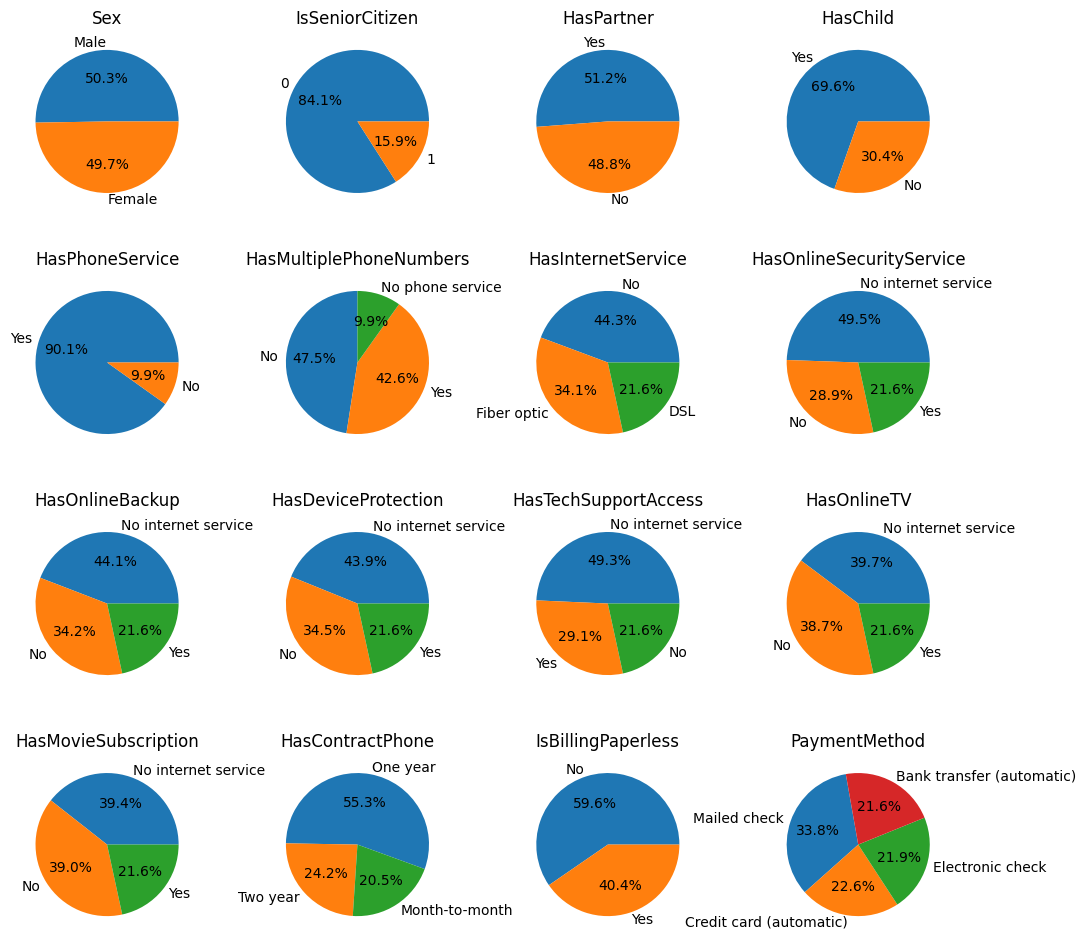

In [8]:
# Построим pie-диаграммы для каждого категориального признака с целью анализа соотношений значений каждого признака
f, axes = plt.subplots(4,4)

f.set_figwidth(12)
f.set_figheight(12)
f.subplots_adjust(wspace=0.4)

for i,ax in enumerate(axes.flatten()):
    startangle = 0
    if i == 5:
        startangle = 90
    elif i == 13:
        startangle = -20
    elif i == 15:
       startangle = 100
    ax.pie(data[cat_cols[i]].value_counts(),autopct='%1.1f%%',labels=data[cat_cols[i]].unique(),startangle=startangle)
    ax.set_title(cat_cols[i])

plt.show()

# На графиках отражено процентное соотношение значений каждого категориального признака

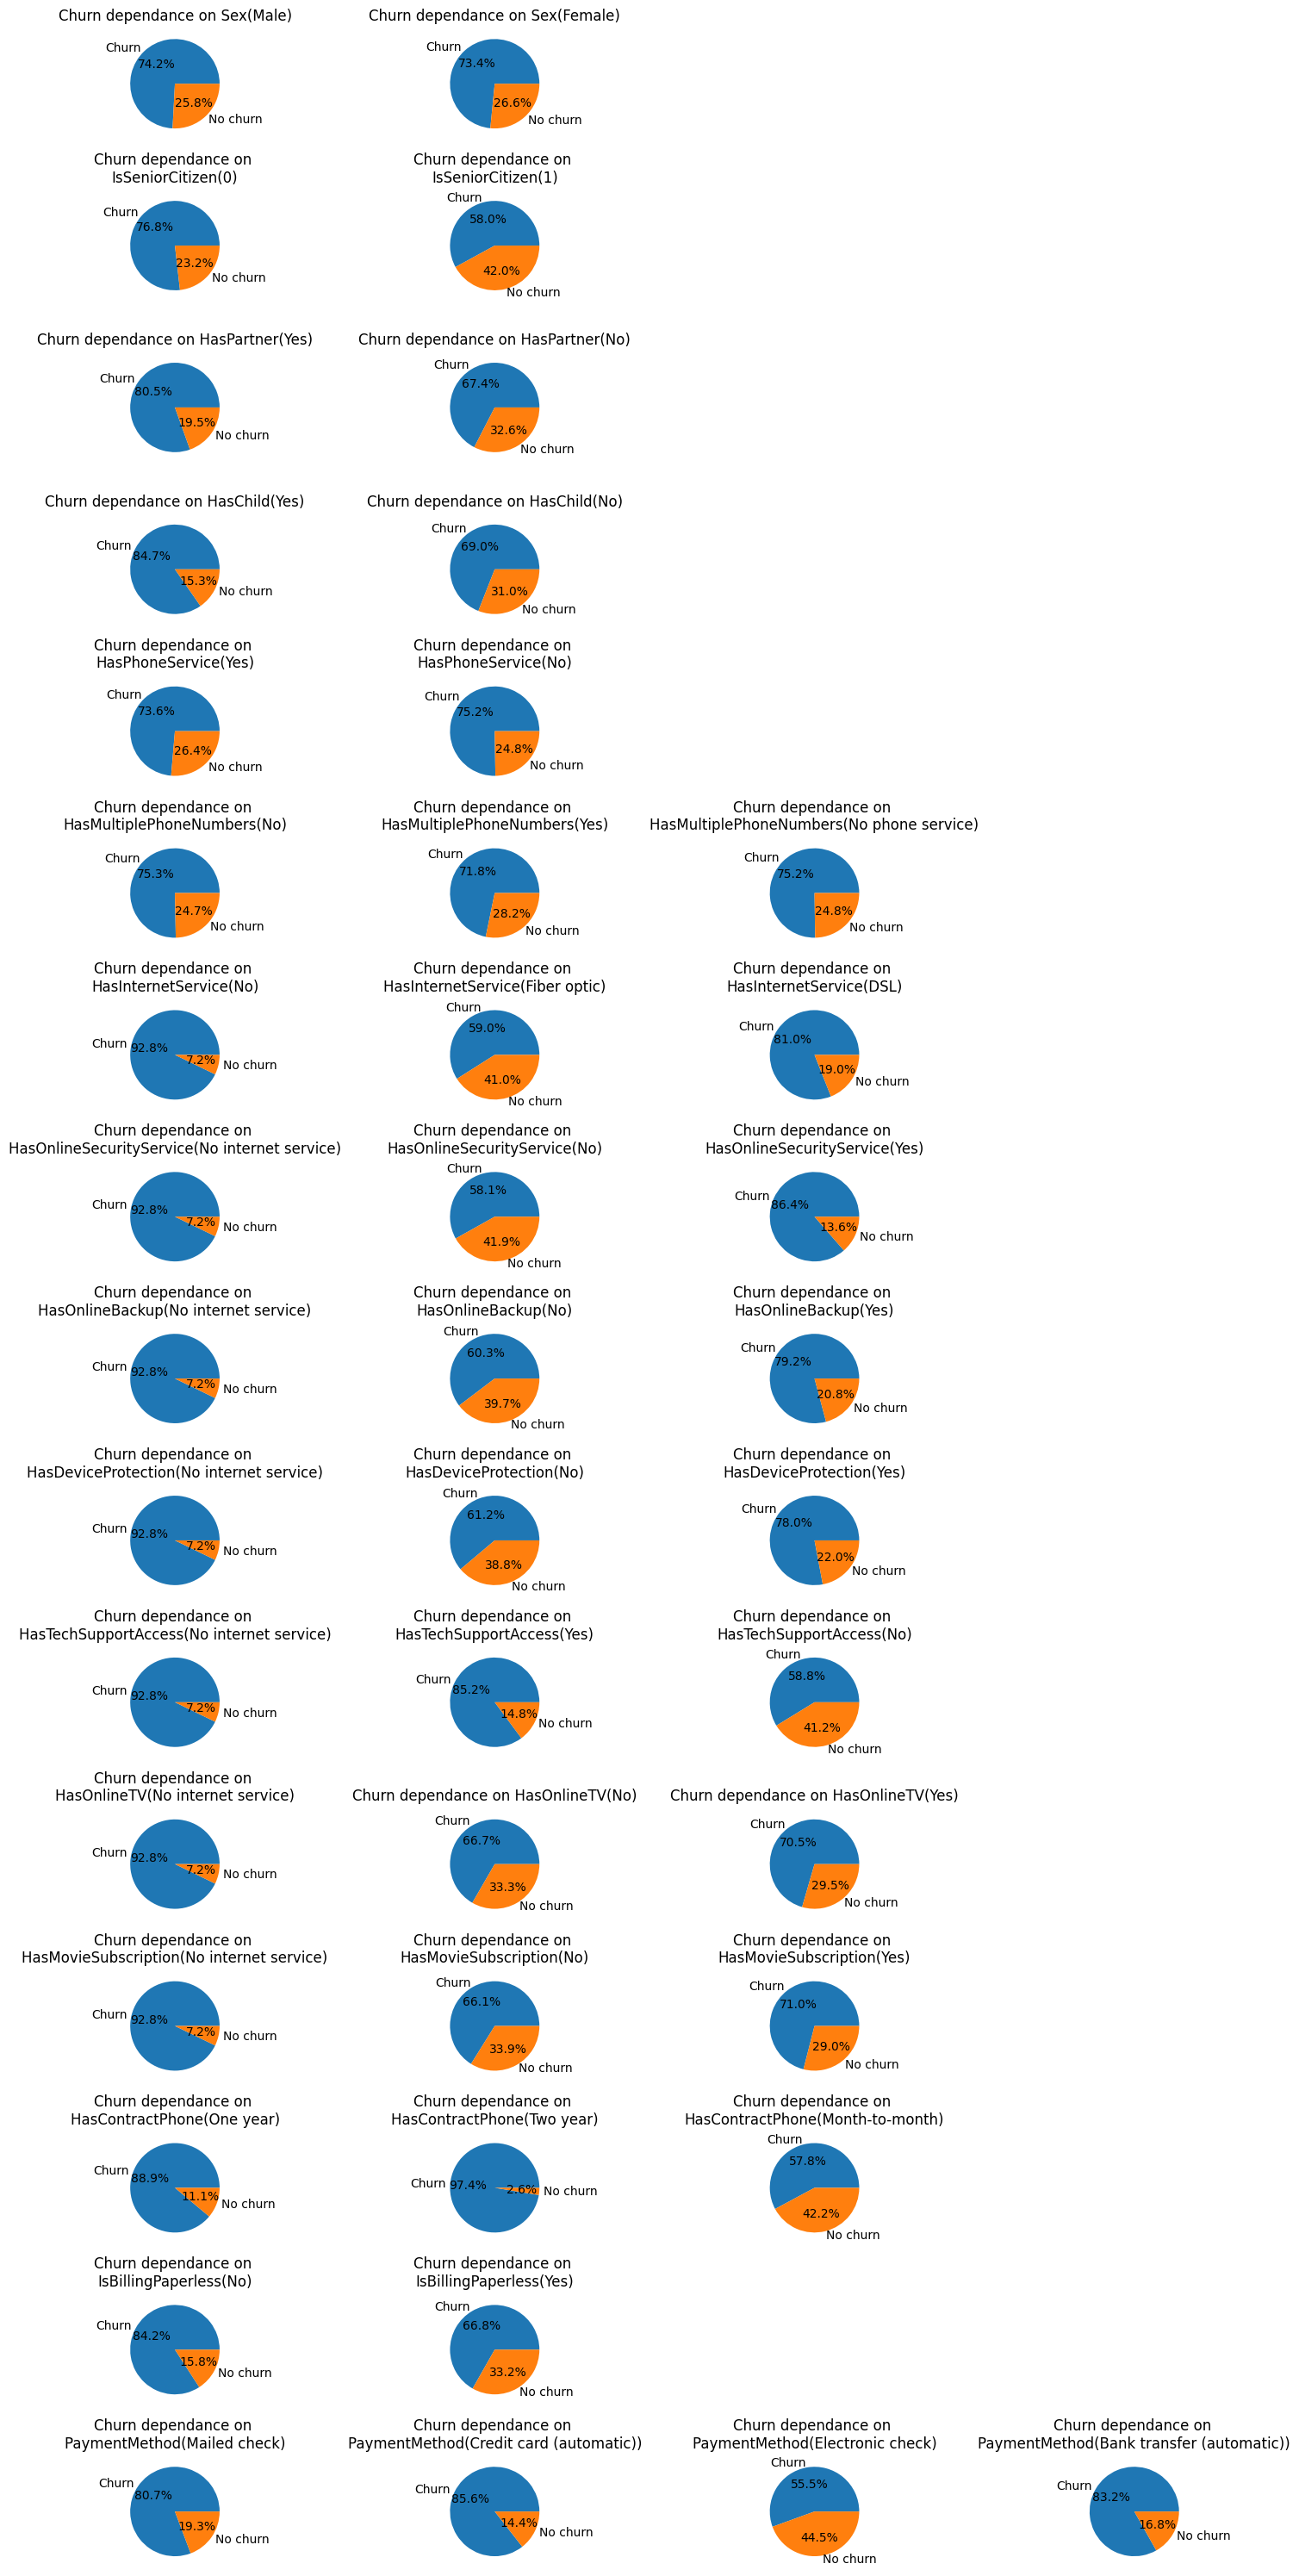

In [9]:
# Построим pie-диаграммы зависимости значений категориальных признаков и значения целевой переменной

fig = plt.figure(figsize=(15,30))

f.subplots_adjust(wspace=0.4)

for i,col in enumerate(cat_cols):
    cat_feature_data = data.loc[:,[col,'Churn']]
    for j, feature_value in enumerate(cat_feature_data[col].unique()):
        ax = plt.subplot2grid((len(cat_cols),4),(i,j))
        pie_data = cat_feature_data[(cat_feature_data[col]==feature_value)].Churn
        ax.pie(pie_data.value_counts(),autopct='%1.1f%%',labels=['Churn','No churn'])
        ax.set_title("Churn dependance on " +  ('\n' if len(col)>=12 or len(feature_value)>=10 else '') + col + f"({feature_value})")

plt.tight_layout()
plt.show()

# Из графиков можно сделать вывод, какие категориальные признаки в большой степени влияют на целевую переменную:
# 1. Является ли абонент пенсионного возраста (признак isSeniorCitizen)
# 2. Есть ли у абонента партнер (HasPartner)
# 3. Есть ли ребенок (HasChild)
# 4. Пользуется ли услугами сети Интернет (HasInternetService)
# 5. Есть ли услуга онлайн безопасности (HasOnlineSecurityService)
# 6. Есть ли услуга онлайн бэкапа (HasOnlineBackup)
# 7. Есть ли защита устройств (HasDeviceProtection)
# 8. Есть ли доступ к техподдержке (HasTechSupportAccess)
# 9. Период, на который заключается контракт на телефон (HasContractPhone)
# 10. Выставление счетов на бумаге или нет (PaperlessBilling)
# 11. Метод оплаты (PaymentMethod)

# Исходя из предварительного анализа этой информации можно сделать вывод, что для снижения оттока пользователей
# может быть предложены какие-либо выгодные условия для подключения недостающих услуг

In [10]:
# Анализ распределения целевой переменной в виде таблицы
data['Churn'].value_counts()

,count
Churn,
0,3898
1,1384


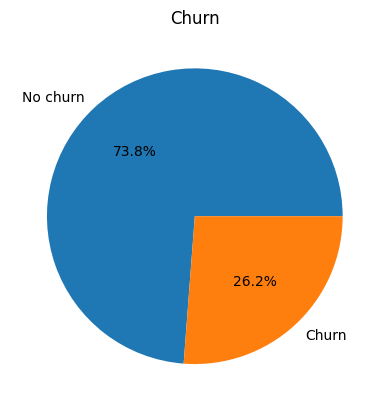

Соотношение значений целевой переменной: кол-во экземпляров класса 0 превышает кол-во класса 1 в 2.82 раз(а)
Вывод: присутствует небольшое небаланс, тем не менее дополнительная обработка данных для устранения небаланса не требуется


In [11]:
# Анализ распределения целевой переменной в виде pie-диаграммы
plt.pie(data['Churn'].value_counts(),labels=['No churn','Churn',],autopct='%1.1f%%')
plt.title('Churn')
plt.show()
print(f"Соотношение значений целевой переменной: кол-во экземпляров класса 0 превышает кол-во класса 1 в {round(data['Churn'].value_counts()[0]/data['Churn'].value_counts()[1],2)} раз(а)")
print('Вывод: присутствует небольшое небаланс, тем не менее дополнительная обработка данных для устранения небаланса не требуется')

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [13]:
# Численные данные для модели попробуем отнормировать 2-мя способами: StandardScaler и RobustScaler

standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

X_num_standard = standard_scaler.fit_transform(data[num_cols].values)
X_num_robust = robust_scaler.fit_transform(data[num_cols].values)

def standard_transform(df):
    return standard_scaler.transform(df)

def robust_transform(df):
    return robust_scaler.transform(df)

In [14]:
# Кодируем категориальные признаки через OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

def get_unprocessed_cat_features(data):
    return data[cat_cols].select_dtypes(include='object').columns.tolist()

def encode_cat_features(df):
    return encoder.transform(df)

X_cat_encoded = encoder.fit_transform(data[get_unprocessed_cat_features(data)])

X_cat_encoded

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [15]:
# DataFrame с категориальными закодированными признаками

cat_df = pd.DataFrame(columns=[*encoder.get_feature_names_out(get_unprocessed_cat_features(data))],data=[*X_cat_encoded])

In [16]:
# DataFrame-ы с численными нормированными признаками

standard_num_df = pd.DataFrame(columns=[*num_cols],data=[*X_num_standard])
robust_num_df = pd.DataFrame(columns=[*num_cols],data=[*X_num_robust])

In [17]:
# DataFrame-ы с после всех предобработок

standard_df = pd.concat([standard_num_df,data['IsSeniorCitizen'],cat_df,data['Churn']],axis=1)
robust_df = pd.concat([robust_num_df,data['IsSeniorCitizen'],cat_df,data['Churn']],axis=1)

In [18]:
from sklearn.metrics import roc_auc_score, roc_curve

In [19]:
# Функция для графика roc-auc кривой

def plot_roc_curve(y_train,y_test,y_train_predicted,y_test_predicted,train_auc,test_auc):
    plt.figure(figsize=(10,10))
    plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
    plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
    legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
    legend_box.set_facecolor("white")
    legend_box.set_edgecolor("black")
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.show()

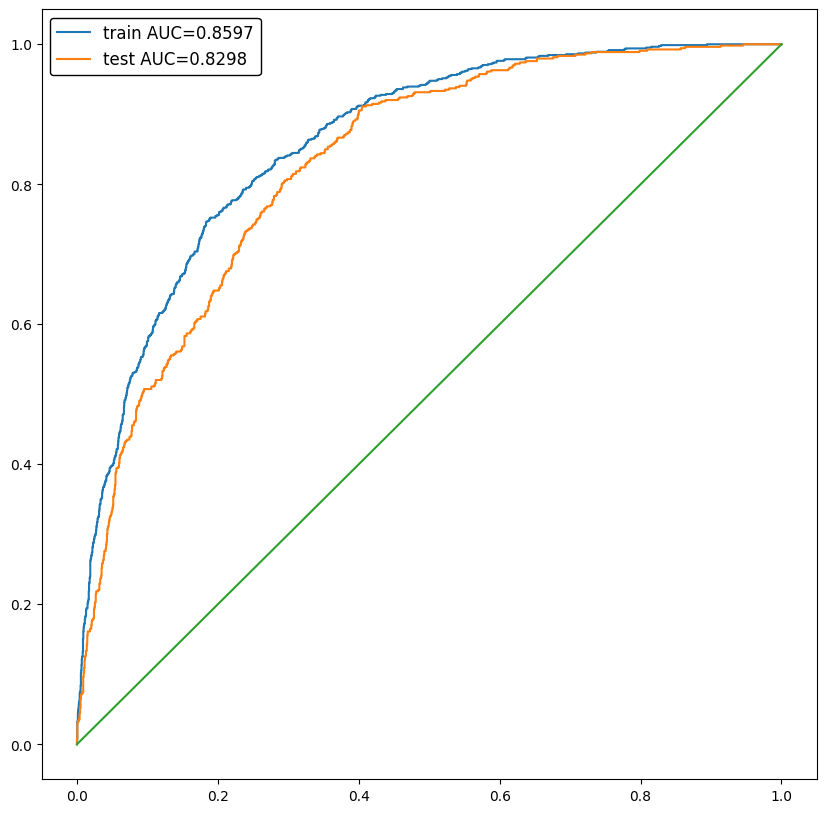

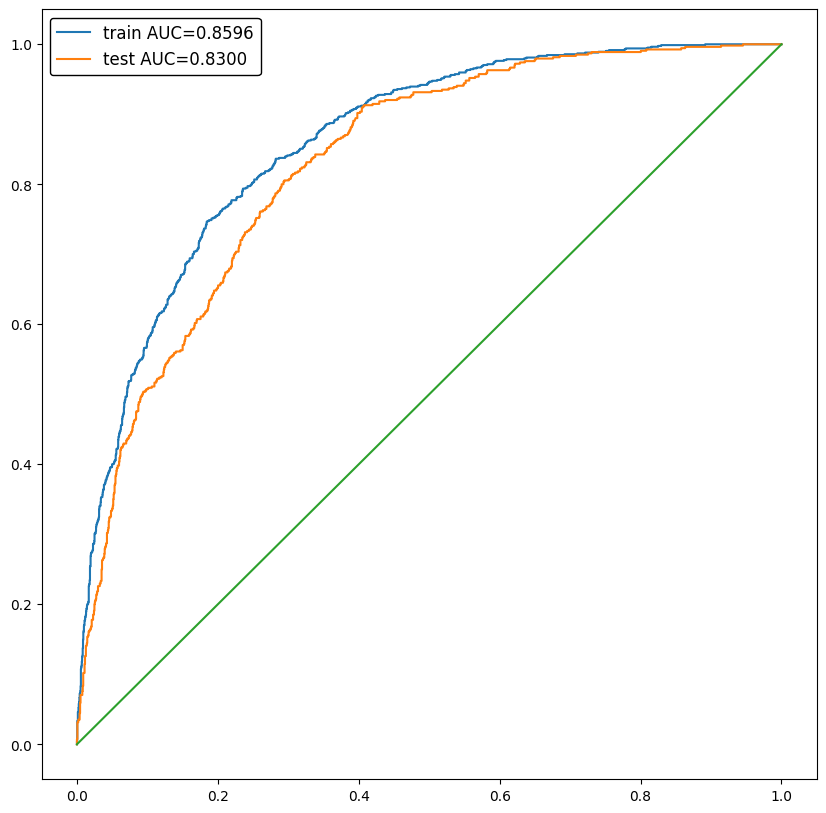

In [20]:
model_dict = {}

for i,df in enumerate([standard_df,robust_df]):
    logreg = LogisticRegressionCV(scoring='roc_auc',refit=True,random_state=42)
    X,y = df.drop('Churn',axis=1).values,df['Churn']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
    logreg.fit(X_train,y_train)
    logreg.predict(X_test)
    y_pred_train = logreg.predict_proba(X_train)[:, 1]
    y_pred_test = logreg.predict_proba(X_test)[:, 1]
    train_auc = roc_auc_score(y_train,y_pred_train)
    test_auc = roc_auc_score(y_test,y_pred_test)
    model_dict['standard' if i==0 else 'robust'] = (logreg.C_[0],train_auc,test_auc)
    plot_roc_curve(y_train,y_test,y_pred_train,y_pred_test,train_auc,test_auc)


In [21]:
for scaler_name, params in model_dict.items():
    print(f"Для dataframe с {scaler_name} scaler гиперпараметр C равен {round(params[0],2)}, качество roc-auc на train выборке {round(params[1],4)}, на test равно {round(params[2],4)}")

Для dataframe с standard scaler гиперпараметр C равен 21.54, качество roc-auc на train выборке 0.8597, на test равно 0.8298
Для dataframe с robust scaler гиперпараметр C равен 166.81, качество roc-auc на train выборке 0.8596, на test равно 0.83


In [29]:
from sklearn.compose import ColumnTransformer

In [47]:
# Подберем гиперпараметр C для LogisticRegression с помощью GridSearchCV

num_transformer = make_pipeline(RobustScaler())
cat_transformer = make_pipeline(OneHotEncoder(sparse_output=False))

processor = ColumnTransformer([('num',num_transformer,num_cols),('cat',cat_transformer,cat_cols)])

grid = GridSearchCV(LogisticRegression(),scoring='roc_auc',param_grid={'C':range(1,101,1)})

clf = make_pipeline(processor,grid)

X_train,X_test,y_train,y_test = train_test_split(data.drop('Churn',axis=1),data['Churn'],random_state=42,train_size=0.8)

_ = clf.fit(X_train,y_train)

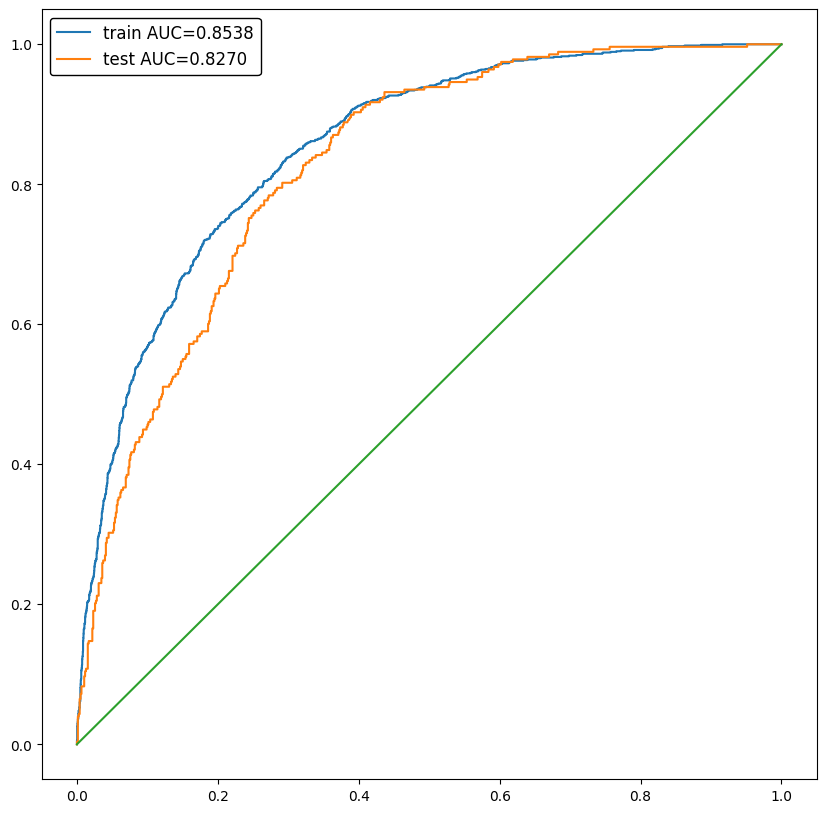

Для текущего подбора лучшее значение на test выборке 0.827 с гиперпараметром C равным 81


In [46]:
y_pred_train = clf.predict_proba(X_train)[:, 1]
y_pred_test = clf.predict_proba(X_test)[:, 1]
train_auc = roc_auc_score(y_train,y_pred_train)
test_auc = roc_auc_score(y_test,y_pred_test)
plot_roc_curve(y_train,y_test,y_pred_train,y_pred_test,train_auc,test_auc)

print(f"Для текущего подбора лучшее значение на test выборке {round(test_auc,4)} с гиперпараметром C равным {clf[1].best_params_.get('C')}")

In [22]:
print("Лучшее качество составило 0.83 с гиперпараметром С равным 166.81")

Лучшее качество составило 0.83 с гиперпараметром С равным 166.81


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [23]:
!pip install catboost -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.8 MB/s eta 0:00:00


In [24]:
import catboost

In [25]:
X,y = data.drop('Churn',axis=1),data['Churn']
X_origin_train,X_origin_test,y_origin_train,y_origin_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [26]:
catboost_model = catboost.CatBoostClassifier(cat_features=cat_cols,logging_level='Silent')

catboost_model.fit(X_origin_train,y_origin_train)

y_pred_train = catboost_model.predict_proba(X_origin_train)[:, 1]
y_pred_test = catboost_model.predict_proba(X_origin_test)[:, 1]

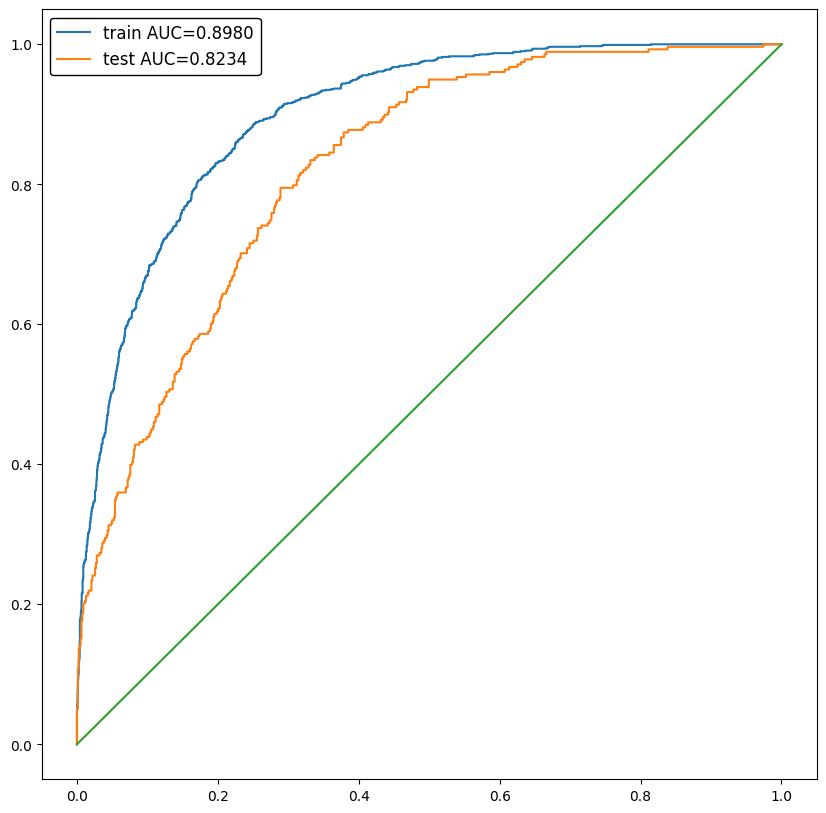

Для модели градиентного бустинга с параметрами по умолчанию roc-auc на train составляет 0.898, на test 0.8234
Гиперпараметры модели по умолчанию: кол-во деревьев 1000, шаг обучения 0.019061999395489693


In [27]:
train_auc = roc_auc_score(y_origin_train,y_pred_train)
test_auc = roc_auc_score(y_origin_test,y_pred_test)
plot_roc_curve(y_origin_train,y_origin_test,y_pred_train,y_pred_test,train_auc,test_auc)
print(f'Для модели градиентного бустинга с параметрами по умолчанию roc-auc на train составляет {round(train_auc,4)}, на test {round(test_auc,4)}')
print(f'Гиперпараметры модели по умолчанию: кол-во деревьев {catboost_model.tree_count_}, шаг обучения {catboost_model.learning_rate_}')

In [ ]:
# Сделаем подбор гиперпараметров модели с помощью встроенного в catboost grid_search

grid_model = catboost.CatBoostClassifier(logging_level='Silent',cat_features=cat_cols, eval_metric='AUC')
grid_model.grid_search({'n_estimators':range(200,1001,100),'learning_rate':np.linspace(0.01,0.02,10)}, X_origin_train, y_origin_train, plot=True, refit=True, verbose=False);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
Metric AUC is not calculated on train by default. To calculate

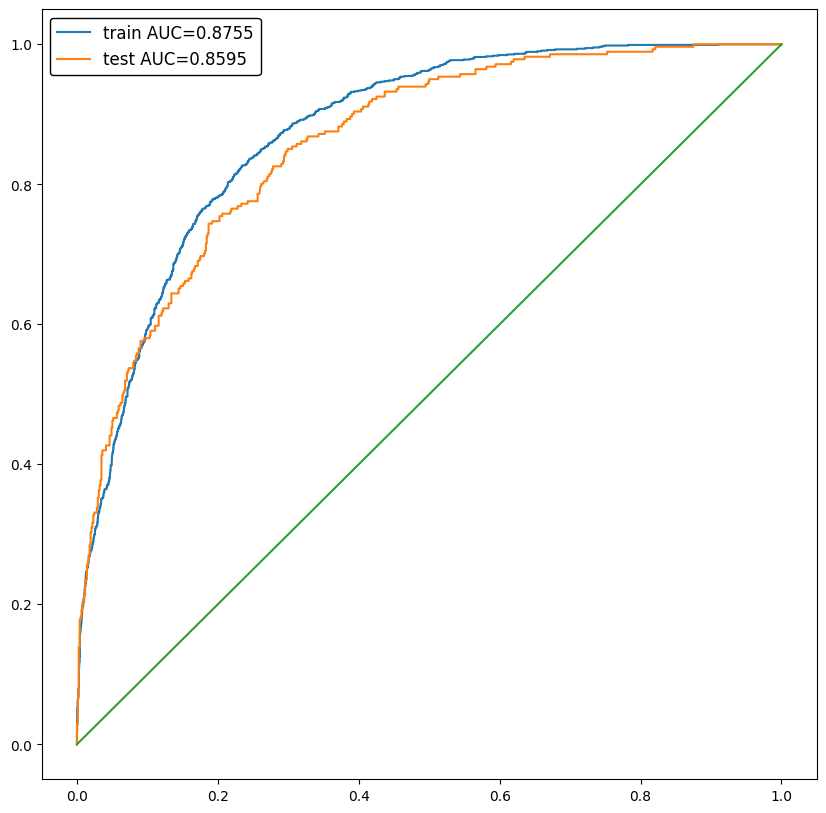

In [ ]:
y_pred_train = grid_model.predict_proba(X_origin_train)[:, 1]
y_pred_test = grid_model.predict_proba(X_origin_test)[:, 1]
train_auc = roc_auc_score(y_origin_train,y_pred_train)
test_auc = roc_auc_score(y_origin_test,y_pred_test)
plot_roc_curve(y_origin_train,y_origin_test,y_pred_train,y_pred_test,train_auc,test_auc)

In [ ]:
print(f'После подбора гиперпараметров лучшей по показателю roc-auc была модель \n с кол-вом деревьем {grid_model.tree_count_} и шагом обучения {round(grid_model.learning_rate_,4)}')
print(f'Roc-auc этой модели для train составил {round(train_auc,4)}, а для test {round(test_auc,4)}')

После подбора гиперпараметров лучшей по показателю roc-auc была модель 
 с кол-вом деревьем 900 и шагом обучения 0.0122
Roc-auc этой модели для train составил 0.8755, а для test 0.8595


# Предсказания

In [ ]:
best_model = grid_model

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv',index_col='Id')

submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.

In [ ]:
submission

,Churn
Id,
0,0.041752
1,0.700637
2,0.692259
3,0.013664
4,0.004269
...,...
1756,0.125988
1757,0.007935
1758,0.835612
